In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd

from oceantracker.post_processing.read_output_files import load_output_files 


## v13

### Looking at track data

In [8]:
tracks = load_output_files.load_particle_track_vars('/scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C001_caseInfo.json',var_list=['water_depth'])

In [3]:
tracks.keys()

dict_keys(['dimensions', 'total_num_particles_released', 'status', 'x0', 'IDpulse', 'time', 'x', 'IDrelease_group', 'dry_cell_index', 'z', 'grid', 'particle_status_flags', 'particle_release_group_info', 'full_params', 'axis_lim'])

In [4]:
status_flags = np.unique(tracks['status'])
status_flags

array([-2,  3,  6, 10], dtype=int8)

In [5]:
# take the tracks and count the different status flags (greater then 0) for each time step and plot
# the results as a time series

# get the unique status flags
status_flags = np.unique(tracks['status'])
# remove status flags less than 0
status_flags = status_flags[status_flags > 0]

# create array to bin for each status flag for each time set
status_counts = np.zeros((len(status_flags), tracks['time'].shape[0]))

# loop over time
for ii in enumerate(tracks['status']):
    # loop over status flags
    for jj in enumerate(status_flags):
        # count the number of particles with the status flag
        status_counts[jj[0], ii[0]] = np.sum(ii[1] == jj[1])

# create pd dataframe
df = pd.DataFrame(status_counts.T, columns=status_flags, index=tracks['time'])
# time from posix to datetime
df.index = pd.to_datetime(df.index, unit='s')

<AxesSubplot:>

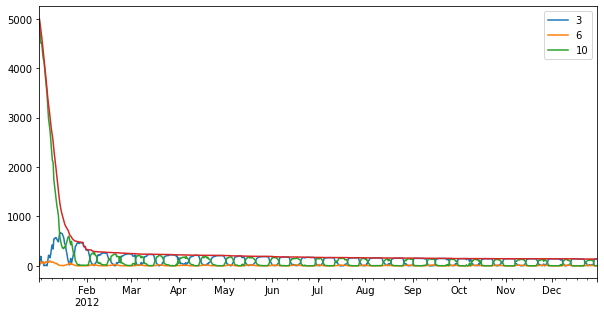

In [6]:
# plot
fig, ax = plt.subplots(figsize=(10, 5))
df.plot(ax=ax)

df.sum(axis=1).plot(ax=ax)

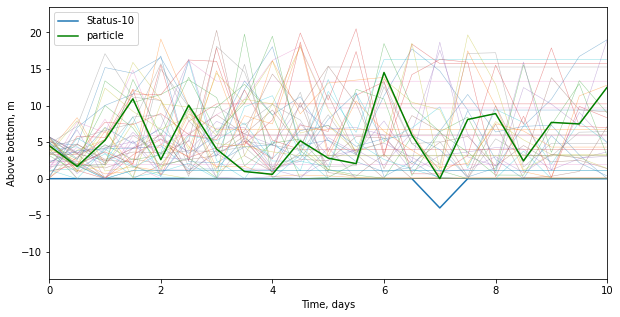

In [24]:
%matplotlib inline
from oceantracker.post_processing.plotting.plot_vertical_tracks import plot_relative_height

tracks = load_output_files.load_particle_track_vars('/scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C001_caseInfo.json',var_list=['water_depth'],fraction_to_read=0.01)

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, 10)
plot_relative_height(tracks, particleID=0, ax=ax, bottom=True)


### neutral buoyancy

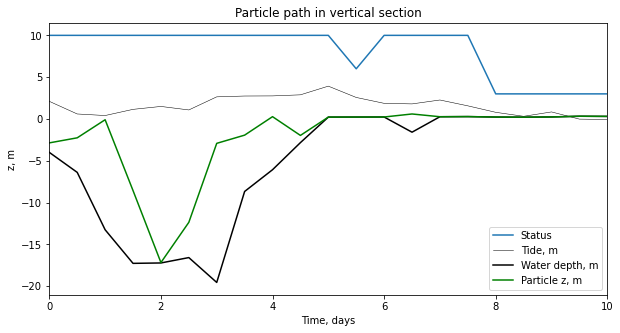

In [37]:
from oceantracker.post_processing.plotting.plot_vertical_tracks import plot_path_in_vertical_section

tracks = load_output_files.load_particle_track_vars('/scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C001_caseInfo.json',var_list=['water_depth','tide'],fraction_to_read=0.01)

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, 10)
plot_path_in_vertical_section(tracks, particleID=np.random.randint(0,50), title='Particle path in vertical section')

### mono negative

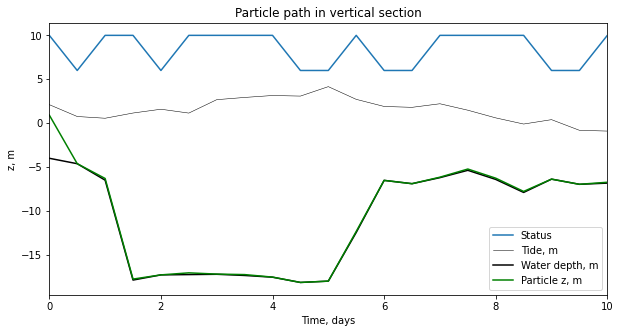

In [38]:
from oceantracker.post_processing.plotting.plot_vertical_tracks import plot_path_in_vertical_section

tracks = load_output_files.load_particle_track_vars('/scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C022_caseInfo.json',var_list=['water_depth','tide'],fraction_to_read=0.01)

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, 10)
plot_path_in_vertical_section(tracks, particleID=np.random.randint(0,50), title='Particle path in vertical section')



### diel vertical migration

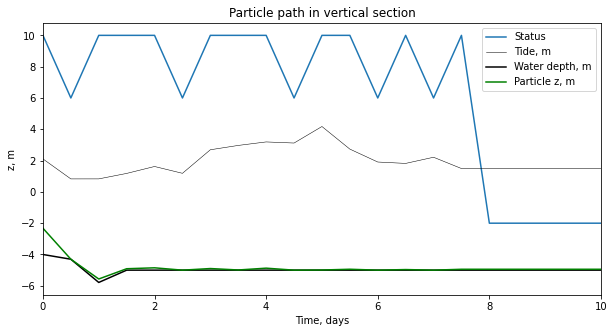

In [39]:
from oceantracker.post_processing.plotting.plot_vertical_tracks import plot_path_in_vertical_section

tracks = load_output_files.load_particle_track_vars('/scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C131_caseInfo.json',var_list=['water_depth','tide'],fraction_to_read=0.01)

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, 10)
plot_path_in_vertical_section(tracks, particleID=np.random.randint(0,50), title='Particle path in vertical section')



### positive mono

<AxesSubplot:>

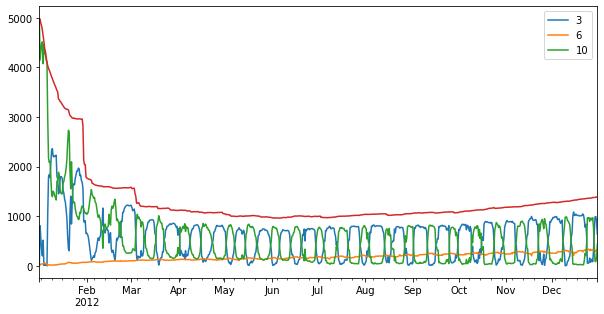

In [41]:
tracks = load_output_files.load_particle_track_vars('/scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C116_caseInfo.json',var_list=['water_depth','tide'],fraction_to_read=1)

# take the tracks and count the different status flags (greater then 0) for each time step and plot
# the results as a time series

# get the unique status flags
status_flags = np.unique(tracks['status'])
# remove status flags less than 0
status_flags = status_flags[status_flags > 0]

# create array to bin for each status flag for each time set
status_counts = np.zeros((len(status_flags), tracks['time'].shape[0]))

# loop over time
for ii in enumerate(tracks['status']):
    # loop over status flags
    for jj in enumerate(status_flags):
        # count the number of particles with the status flag
        status_counts[jj[0], ii[0]] = np.sum(ii[1] == jj[1])

# create pd dataframe
df = pd.DataFrame(status_counts.T, columns=status_flags, index=tracks['time'])
# time from posix to datetime
df.index = pd.to_datetime(df.index, unit='s')

# plot
fig, ax = plt.subplots(figsize=(10, 5))
df.plot(ax=ax)

df.sum(axis=1).plot(ax=ax)

### Looking at the stats data files
Seems like they have the same kind of issue. Issue seems to be caused (in both cases) by merging multiple sets of stats polies. 

In [2]:
path_to_dir = '/scratch/local1/output/22_12_08_retention_v13'

In [3]:
cases = load_output_files.get_case_info_files_from_dir(path_to_dir)

Warning  some cases file missing from dir  /scratch/local1/output/22_12_08_retention_v13 , missing case files for case number(s) = [67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 112, 113, 114, 115, 116, 119, 120, 121, 122, 123, 124, 126, 127, 129, 130, 131, 133, 134, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219]


In [10]:
import json
def load_polycounts_adhoc(cases, case_number):
    
    with open(cases[case_number]) as f:
        case_info = json.load(f)
        stats_file_names = case_info['output_files']['particle_statistics']
        stats_file_paths = [os.path.join(os.path.dirname(cases[case_number]), item) for item in stats_file_names]
        
    counts = []
    for item in stats_file_paths:
        print(item)
        with nc.Dataset(item) as df:
            print(df.variables.keys())
            counts.append(np.array(df.variables['count'])[:,0,:])



    return counts

counts = load_polycounts_adhoc(cases, 0)

/scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C001_stats_polygon_time_001.nc
dict_keys(['time', 'num_released', 'count', 'count_all_particles', 'number_released_each_release_group'])
/scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C001_stats_polygon_time_002.nc
dict_keys(['time', 'num_released', 'count', 'count_all_particles', 'number_released_each_release_group'])
/scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C001_stats_polygon_time_003.nc
dict_keys(['time', 'num_released', 'count', 'count_all_particles', 'number_released_each_release_group'])
/scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C001_stats_polygon_time_004.nc
dict_keys(['time', 'num_released', 'count', 'count_all_particles', 'number_released_each_release_group'])
/scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C001_stats_polygon_time_005.nc
dict_keys(['time', 'num_released', 'count', 'count_all_particles', 'number_r

In [12]:
counts[3].shape

(525541, 13)

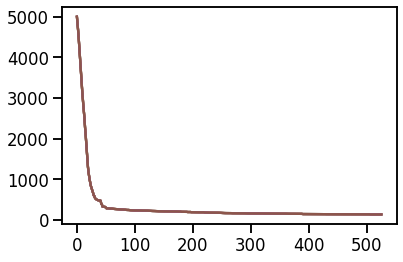

In [15]:
for item in np.array(counts):
    plt.plot(np.sum(item[::1000],axis=1))

## v12 analysis
Summary: the stats poly status slicer mergers buggy. always fetches frozen to moving. quick fix attemp is to move stats poly to case instead of base

In [15]:
df1 = '/scratch/local1/output/22_12_08_retention_v12/22_12_08_retention_v12/22_12_08_retention_v12_C021_stats_polygon_time_001.nc'
df2 = '/scratch/local1/output/22_12_08_retention_v12/22_12_08_retention_v12/22_12_08_retention_v12_C021_stats_polygon_time_002.nc'

In [24]:
moving = nc.Dataset(df1).variables['count'][:,0,:].sum(axis=1)
all = nc.Dataset(df1).variables['count_all_particles'][:,0]
stranded = nc.Dataset(df2).variables['count'][:,0,:].sum(axis=1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
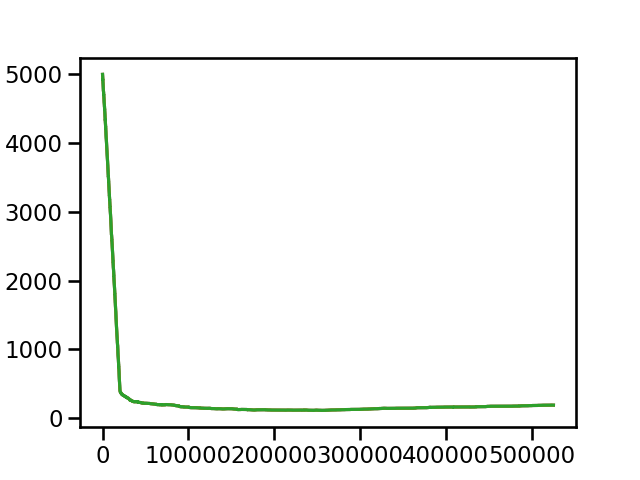

In [25]:
plt.figure()
plt.plot(moving)
plt.plot(stranded)
plt.plot(all)
plt.show()